In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from fastai.vision.all import *
import cv2
from PIL import Image

import src.stages.model as modelling_package

# Pending test to see if we can load the GeoTIFF
with rasterio.open('datasets/imagenes_entrenamiento/Modelo2_GeoTIff/52.a.05.006+51.a.01.101/hrm_122309_52.a.05.006_51.a.01.101.tif') as dataset:
    images = dataset.read()  # Load all bands as a multi-dimensional array
    labels = dataset.meta['some_metadata_key']  # Assuming labels are stored in metadata


# Convert TIFF to JPEG using OpenCV


IF dataset is in GEOTIFF Format. Convert it to .JPEG Folder.

#Note: there is still work to do on the band optimization mapping.

In [ ]:
transformer = modelling_package.TransformGeoTIFtoJPEG()
pathtoJPEGfolder = '' #Subsistute folder path here
transformer.runfolder_transform(pathtoJPEGfolder)

# Based Model API torch request

In [3]:
import ssl
import urllib.request

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

All available models: https://pytorch.org/vision/stable/models.html

# Load Training and Test Set

In [11]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
import random

# Set a fixed seed for reproducibility
seed = 40
torch.manual_seed(seed)  # Example seed

test_n = 0.15
val_n = 0.15
train_n = 0.7

# Define data transformations with augmentations
data_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),


])


# Load dataset
data_dir = '' ##Use you dataset (JPEG) path!
image_dataset = datasets.ImageFolder(data_dir, transform=data_transforms) ##dictionary of type image_dataset.imgs[0:n_items-1][0:n_classes-1]

# Split data into train, validation, test
train_size = int(train_n * len(image_dataset))
val_size = int(val_n * len(image_dataset))
test_size = len(image_dataset) - val_size - train_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(image_dataset, [train_size, val_size, test_size])

# Create data loaders
seed = 40
torch.manual_seed(seed)  # Example seed
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [68]:
for batch_idx, (data, target) in enumerate(test_loader):
    # Print the batch data and targets
    print(f"Batch {batch_idx}:")
    print("Dimension1:", len(data))
    print("Dimension2 Channels:", len(data[0]))
    print("Dimension3 size:", len(data[0][0]))
    print("Dimension4 size:", len(data[0][0][0]))
    print("Target:", target)

Batch 0:
Dimension1: 32
Dimension2 Channels: 3
Dimension3 size: 224
Dimension4 size: 224
Target: tensor([3, 3, 1, 3, 3, 4, 4, 4, 2, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 3, 0, 3, 3,
        3, 3, 4, 4, 3, 3, 3, 3])
Batch 1:
Dimension1: 32
Dimension2 Channels: 3
Dimension3 size: 224
Dimension4 size: 224
Target: tensor([3, 4, 4, 2, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 2, 4, 0, 4, 4, 3, 3, 3, 3, 4,
        4, 3, 4, 3, 3, 2, 2, 3])
Batch 2:
Dimension1: 32
Dimension2 Channels: 3
Dimension3 size: 224
Dimension4 size: 224
Target: tensor([3, 2, 2, 4, 2, 3, 2, 3, 0, 2, 2, 2, 2, 2, 3, 4, 2, 3, 4, 3, 2, 3, 3, 3,
        3, 0, 2, 4, 4, 2, 0, 3])
Batch 3:
Dimension1: 32
Dimension2 Channels: 3
Dimension3 size: 224
Dimension4 size: 224
Target: tensor([0, 3, 3, 2, 4, 4, 3, 0, 2, 3, 3, 3, 2, 2, 2, 4, 3, 0, 4, 0, 3, 4, 0, 4,
        3, 2, 1, 3, 3, 3, 3, 3])
Batch 4:
Dimension1: 32
Dimension2 Channels: 3
Dimension3 size: 224
Dimension4 size: 224
Target: tensor([0, 1, 0, 4, 2, 2, 0, 4, 3, 4, 2, 4, 3, 2, 2, 3, 2, 0, 0

In [4]:
# Get original filenames and class indices
original_filenames = [item[0] for item in image_dataset.imgs]
class_indices = [item[1] for item in image_dataset.imgs] #if item[1]== 4

# Get original class names
original_class_names = image_dataset.classes
original_class_names = [original_class_names[idx] for idx in class_indices]


class_names = dict(zip(class_indices,original_class_names))
class_counts = {}

for idx in class_indices:
    if idx in class_counts:
        class_counts[idx] += 1

    else: 
        class_counts[idx] = 1

for idx,count in class_counts.items():

    print(idx, " ", count)

print(class_names)



0   370
1   128
2   458
3   952
4   675
{0: '0_model4_50.a.01.101', 1: '1_model4_59.b.04.101', 2: '2_model4_76.c.10.001', 3: '3_model4_52.a.05.001', 4: '4_model4_61.a.02.004'}


# Train Model

In [6]:
import torchvision.models as models

available_models = [i for i in dir(models)]


for i in available_models:
    print(i)

AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights
ConvNeXt_Small_Weights
ConvNeXt_Tiny_Weights
DenseNet
DenseNet121_Weights
DenseNet161_Weights
DenseNet169_Weights
DenseNet201_Weights
EfficientNet
EfficientNet_B0_Weights
EfficientNet_B1_Weights
EfficientNet_B2_Weights
EfficientNet_B3_Weights
EfficientNet_B4_Weights
EfficientNet_B5_Weights
EfficientNet_B6_Weights
EfficientNet_B7_Weights
EfficientNet_V2_L_Weights
EfficientNet_V2_M_Weights
EfficientNet_V2_S_Weights
GoogLeNet
GoogLeNetOutputs
GoogLeNet_Weights
Inception3
InceptionOutputs
Inception_V3_Weights
MNASNet
MNASNet0_5_Weights
MNASNet0_75_Weights
MNASNet1_0_Weights
MNASNet1_3_Weights
MaxVit
MaxVit_T_Weights
MobileNetV2
MobileNetV3
MobileNet_V2_Weights
MobileNet_V3_Large_Weights
MobileNet_V3_Small_Weights
RegNet
RegNet_X_16GF_Weights
RegNet_X_1_6GF_Weights
RegNet_X_32GF_Weights
RegNet_X_3_2GF_Weights
RegNet_X_400MF_Weights
RegNet_X_800MF_Weights
RegNet_X_8GF_Weights
RegNet_Y_128GF_Weights
RegNet_Y_16GF_We

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
import time

#### ResNet Model specifications.

# Load pre-trained ResNet model


# model = torchvision.models.vit_b_16(pretrained=True)
# model = torchvision.models.swin_v2_b(pretrained=True)
# model = torchvision.models.vgg16(pretrained=True)
# model = torchvision.models.resnet50(pretrained=True)
# model = torchvision.models.densenet121(pretrained= True) 


# Modify last layer for your classification task
model = torchvision.models.vgg16(pretrained=True)
num_features = 4096 # Get the number of input features to the last layer
num_classes = 5  # Define the number of classes in your classification task
model.classifier[6]  = nn.Linear(num_features, num_classes) ##Careful Here! Depending if it's a transformer or a cnn you will have to change head or linear








model_name = 'VGG_16'
dataset_n = '4'

In [9]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
import torch.autograd.profiler as profiler

# with profiler.profile(record_shapes=True, use_cuda=True) as prof:
train_times = []
train_costs = []
total_training_time = 0.0
total_data_points_processed = 0

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Lists to store training loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Best accuracy tracking
best_val_accuracy = 0.0
best_model_state = None

# Train the model
num_epochs = 100
target_accuracy = 1.00

for epoch in range(num_epochs):
    start_time = time.time()  # Record start time for epoch
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    seed = 42
    torch.manual_seed(seed)  # Example seed. THIS IS CHANGED ON THE VGG16 5 LOGIT TRAINING: SEE PERFORMANCE
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item() * inputs.size(0)
        total_data_points_processed += inputs.size(0)  # Increment total data points processed

    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    end_time = time.time()  # Record end time for epoch
    epoch_time = end_time - start_time  # Calculate epoch training time
    total_training_time += epoch_time
    
    print(f"Epoch {epoch+1}/{num_epochs} Loss: {epoch_loss:.4f} Accuracy: {epoch_accuracy:.4f}. Time: {epoch_time}. Total Time: {total_training_time}")

    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0


    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)

            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item() * val_inputs.size(0)

            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()


        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        val_accuracy = val_correct / val_total
        val_accuracies.append(val_accuracy)
        print(f"Epoch {epoch+1}/{num_epochs} Validation Accuracy: {val_accuracy:.4f}")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            # Save the state of the best model so far
            best_model_state = model.state_dict() 

        # Check if the target accuracy is reached
        if val_accuracy >= target_accuracy:
            print(f"Target accuracy of {target_accuracy} reached. Stopping training.")
            break

    ##Loading best model - epoch after the training. TURNED OFF RIGHT NOW
    # if best_model_state is not None:
    #     model.load_state_dict(best_model_state)
# prof.export_chrome_trace("profile.json")


In [12]:
# Create a dictionary to store model architecture details
dir_folder= '' #path_to_model_output_dir
model_details = {
    'Model Name': model.__class__.__name__,
    'Model Variation': f'{dataset_n}_{model_name}',
    'Number of Layers': len(list(model.parameters())),
    'Number of Parameters': sum(p.numel() for p in model.parameters() if p.requires_grad),
    'Optimizer': optimizer.__class__.__name__,
    'Criterion': criterion.__class__.__name__,
    'Training Time (min)': total_training_time/60,
    'Data Points (img)': total_data_points_processed,
    'Training Losses': train_losses,
    'Training Accuracies': train_accuracies,
    'Validation Losses': val_losses,
    'Validation Accuracies': val_accuracies,
    'Num Epochs': epoch + 1,
    'Test Random Seed': seed,
    'Train Data': train_n ,
    'Val Data': val_n,
    'Test Data':test_n,
    'Images': len(image_dataset)
}

# Convert the dictionary to a DataFrame
meta_df = pd.DataFrame([model_details])

# Save DataFrame to Excel
meta_path = os.path.join(dir_folder,f'meta_{model_name}.xlsx')
meta_df.to_excel(meta_path, index=False)
print("Model meta data saved successfully.")


Model meta data saved successfully.


# Save Training Curve

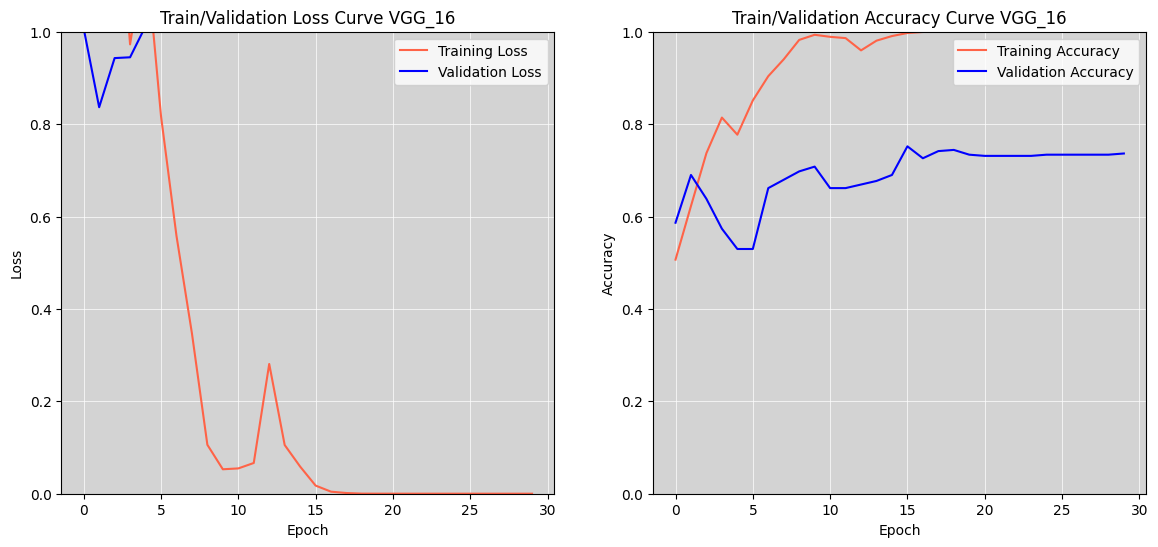

In [11]:
import os
import matplotlib.pyplot as plt

# Define the directory for saving the image
save_results_dir = '' #Path to results output folder
viz_name = f'{model_name}' # New directory for saving plots
viz_title = f'{model_name}' 
os.makedirs(save_results_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Plotting training loss and accuracy curves
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns for subplots

# First subplot for loss curves
axes[0].plot(train_losses, label='Training Loss',color='tomato')
axes[0].plot(val_losses, label='Validation Loss',color='blue')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title(f'Train/Validation Loss Curve {viz_name}')
axes[0].legend()
axes[0].grid(True, color='white', linestyle='-', linewidth=0.5)  # Add white grid lines
axes[0].set_facecolor('lightgrey')
axes[0].set_ylim(0, 1)  # Set y-axis limits from 0 to 1

# Second subplot for accuracy curves
axes[1].plot(train_accuracies, label='Training Accuracy', color='tomato')
axes[1].plot(val_accuracies, label='Validation Accuracy', color='blue')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title(f'Train/Validation Accuracy Curve {viz_name}')
axes[1].legend()
axes[1].grid(True, color='white', linestyle='-', linewidth=0.5)  # Add white grid lines
axes[1].set_facecolor('lightgrey')
axes[1].set_ylim(0, 1)  # Set y-axis limits from 0 to 1



# Save the plot as an image file
image_path = os.path.join(save_results_dir, viz_name)
plt.savefig(image_path)

plt.show()


In [12]:
print(model)

SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlockV2(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttentionV2(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
          (cpb_mlp): Sequential(
            (0): Linear(in_features=2, out_features=512, bias=True)
            (1): ReLU(inplace=True)
            (2): Linear(in_features=512, out_features=3, bias=False)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='

# Save Classification Report

In [ ]:
import pandas as pd
import openpyxl
from sklearn.metrics import classification_report

# Define the directory and filename for saving the Excel file
save_results_dir = '
excel_filename = f"model_{dataset_n}_{model_name}_seed4.xlsx"
excel_path = os.path.join(save_results_dir, excel_filename)

# Test the final model
seed = 4
torch.manual_seed(seed) 

model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())

# Calculate classification report
report = classification_report(true_labels, predicted_labels, output_dict=True)

# Convert classification report to pandas DataFrame
df = pd.DataFrame.from_dict(report)
print("Pandas DataFrame:")
print(df)

# Save DataFrame to Excel file
df.to_excel(excel_path, index=True)

print(f"Classification report saved to: {excel_path}")



# Save Confusion Matrix

{0: 'Mixture grasslands', 1: 'Waterlogged pastures', 2: 'Q.faginea grasslands', 3: 'G.scorpius grasslands', 4: 'E.australis and crassifolious'}


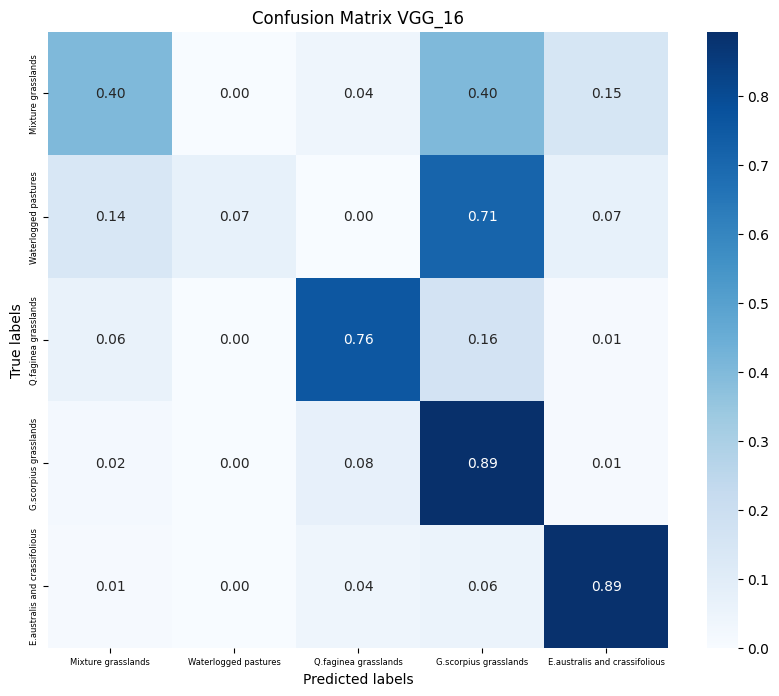

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

seed = 42
torch.manual_seed(seed)  # Example seed. Be very Carefull. If seed is not set here too. Data Loader will create a different testing set.

CV_labels = {
    "50.a.01.101": "Mixture grasslands",
    "59.b.04.101": "Waterlogged pastures",
    "76.c.10.001": "Q.faginea grasslands",
    "52.a.05.001": "G.scorpius grasslands",
    "61.a.02.004": "E.australis and crassifolious"
}

# Get original filenames and class indices
original_filenames = [item[0] for item in image_dataset.imgs]
class_indices = [item[1] for item in image_dataset.imgs] #if item[1]== 4

# Get original class names
original_class_names = image_dataset.classes
original_class_names = [original_class_names[idx] for idx in class_indices]

class_names = dict(zip(class_indices,original_class_names))

for i in range(len(class_names)):
    for label in CV_labels:
        if label in class_names[i]:
            class_names[i] = CV_labels[label]

print(class_names)


# Test the final model
model.eval()
true_labels = []
predicted_labels = []
outputs_m = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        outputs_m.append(outputs)
        class_label, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())


# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# Normalize confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


# Plot confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", fmt='.2f')  # Use '.2f' format to display floats with 2 decimal places
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix {viz_name}')

# Set x-axis and y-axis labels using original class names with centered labels
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names.values(), fontsize=6)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names.values(), fontsize=6)

plt.show()

# Define the directory for saving the image
# image_dir = ''
# os.makedirs(image_dir, exist_ok=True)  # Create the directory if it doesn't exist


# Save the confusion matrix plot as an image file
# viz_name = f'{model_name}'
# image_path = os.path.join(image_dir, f'{viz_name}.jpeg')
# plt.savefig(image_path, format='jpeg')  
# plt.close()  # Close the plot to release resources


#TEST COPNFUSION MATRIX ON ROWS

# Detect and Save Hard Negatives/Positives (Alias Hard Instances or Ambiguous Instances)

In [ ]:
import os
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF


original_filenames = [item[0] for item in image_dataset.imgs]

# Create a directory to save images
save_dir = 
folder_name = f'Modelo{dataset_n}_JPEG_miss' #We accumulate all in one to do posterior analysis of clusters.
folder_dir = os.path.join(save_dir,folder_name)

os.makedirs(folder_dir, exist_ok=True)

# Test the final model
model.eval()
true_labels = []
predicted_labels = []
misclassified_images = []

with torch.no_grad():
    for idx, (inputs, labels) in enumerate(test_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())
        
        # Check if predicted label is different from true label
        misclassified_mask = predicted != labels
        misclassified_inputs = inputs[misclassified_mask]
        misclassified_true_labels = labels[misclassified_mask]
        misclassified_predicted_labels = predicted[misclassified_mask]

        # Save misclassified images
        for i in range(misclassified_inputs.shape[0]):
            img = misclassified_inputs[i]
            true_label = misclassified_true_labels[i]
            predicted_label = misclassified_predicted_labels[i]
            
            # Get original filename for the image
            index = idx * test_loader.batch_size + i
            original_filename = original_filenames[index]
            original_filename = original_filename.split('/')[-1]
            original_filename = original_filename.replace('.JPEG', '')
            
            img_filename = f"miss_{original_filename}_{model_name}_{true_label}_{predicted_label}.JPEG" #Including Model Name info
            img_path = os.path.join(folder_dir, img_filename)
            misclassified_images.append((img_path, true_label, predicted_label, original_filename))
            img = TF.to_pil_image(img)
            print(img_filename)
            print(img_path)
            img.save(img_path)

# Print misclassified images information
for img_path, true_label, predicted_label, original_filename in misclassified_images:
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}, Original Filename: {original_filename}")

In [16]:
import pandas as pd

save_results_dir = '' #path to model error saving folder (This data can be later tracked to detect bad quality date or clusters crossing around differential lines)

# Create a DataFrame to store the misclassified image information
data = {
    'Filename': [info[3] for info in misclassified_images],
    'True Label': [info[1] for info in misclassified_images],
    'Predicted Label': [info[2] for info in misclassified_images]
}

df = pd.DataFrame(data)

# Save the DataFrame to a .xlsx file
output_file = f'misclassified_images_model_{dataset_n}_{model_name}.xlsx'
dir_file = os.path.join(save_results_dir,output_file)
df.to_excel(dir_file, index=False)

print(f"Misclassified images information saved to {output_file}")

Misclassified images information saved to misclassified_images_model_4_model4_DenseNet_121.xlsx


# Save Model

In [15]:
# Save the model using PyTorch's serialization method
model_name = f'model{dataset_n}_{model_name}'
dir_folder= '' #folder path to save models
path = os.path.join(dir_folder, f'{model_name}.pth')
torch.save(model, path)
print("Model saved successfully.")

Model saved successfully.


In [16]:
# Create a dictionary to store model architecture details
dir_folder= '' #folder path to store architectures
model_details = {
    'Model Name': model.__class__.__name__,
    'Model Variation': f'{dataset_n}_{model_name}',
    'Number of Layers': len(list(model.parameters())),
    'Number of Parameters': sum(p.numel() for p in model.parameters() if p.requires_grad),
    'Optimizer': optimizer.__class__.__name__,
    'Criterion': criterion.__class__.__name__,
    'Training Time (min)': total_training_time/60,
    'Data Points (img)': total_data_points_processed,
    'Training Losses': train_losses,
    'Training Accuracies': train_accuracies,
    'Validation Losses': val_losses,
    'Validation Accuracies': val_accuracies,
    'Num Epochs': epoch + 1,
    'Test Random Seed': seed,
    'Train Data': train_n ,
    'Val Data': val_n,
    'Test Data':test_n,
    'Images': len(image_dataset)
}

# Convert the dictionary to a DataFrame
meta_df = pd.DataFrame([model_details])

# Save DataFrame to Excel
meta_path = os.path.join(dir_folder,f'meta_{model_name}.xlsx')
meta_df.to_excel(meta_path, index=False)
print("Model meta data saved successfully.")


Model meta data saved successfully.


## Load Models and load tests

Important Note: As it is for now. We use after loading the model a random test set from our datapool. (At the Load test stage) Best practice is to develop a stage which also saves the test set in our /datasets folder in order to load the exact same test set (alias "left out batches") during the training. Avoiding using images that were implied on training the model.

In [17]:
# Load the model using PyTorch's deserialization method
model_filename = 'model4_DenseNet_121.pth'  # 'model4_ViTb16_Linear_Layer_5.pth' model4_ViT-b16.pth model4_SwinV2-t.pth 'model4_DenseNet_121.pth' model4_ResNet50.pth model4_VGG16.pth
model = torch.load(''+model_filename)#Define loading path and load your models!
model_name = 'ViTb16'
dataset_n = '4'
viz_name = f'{model_name}' # New directory for saving plots

print(f"Model loaded successfully. {model.__class__.__name__}")

Model loaded successfully. DenseNet


In [5]:
print(model) #print info

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [41]:
from torchinfo import summary
import torch

# Print model summary
summary = summary(model, (32, 3, 224, 224), verbose=0)

# Print model summary in tabular format
print(summary)

Layer (type:depth-idx)                   Output Shape              Param #
DenseNet                                 [32, 5]                   --
├─Sequential: 1-1                        [32, 1024, 7, 7]          --
│    └─Conv2d: 2-1                       [32, 64, 112, 112]        9,408
│    └─BatchNorm2d: 2-2                  [32, 64, 112, 112]        128
│    └─ReLU: 2-3                         [32, 64, 112, 112]        --
│    └─MaxPool2d: 2-4                    [32, 64, 56, 56]          --
│    └─_DenseBlock: 2-5                  [32, 256, 56, 56]         --
│    │    └─_DenseLayer: 3-1             [32, 32, 56, 56]          45,440
│    │    └─_DenseLayer: 3-2             [32, 32, 56, 56]          49,600
│    │    └─_DenseLayer: 3-3             [32, 32, 56, 56]          53,760
│    │    └─_DenseLayer: 3-4             [32, 32, 56, 56]          57,920
│    │    └─_DenseLayer: 3-5             [32, 32, 56, 56]          62,080
│    │    └─_DenseLayer: 3-6             [32, 32, 56, 56]    

In [ ]:
# Create a dictionary to store model architecture details
dir_folder= '' #Store model meta info results
model_details = {
    'Model Name': model.__class__.__name__,
    'Model Variation': f'{dataset_n}_{model_name}',
    'Number of Layers': len(list(model.parameters())),
    'Number of Parameters': sum(p.numel() for p in model.parameters() if p.requires_grad),
    'Optimizer': optimizer.__class__.__name__,
    'Criterion': criterion.__class__.__name__,
    'Training Time (min)': total_training_time/60,
    'Data Points (img)': total_data_points_processed,
    'Training Losses': train_losses,
    'Training Accuracies': train_accuracies,
    'Validation Losses': val_losses,
    'Validation Accuracies': val_accuracies,
    'Num Epochs': epoch + 1,
    'Test Random Seed': seed,
    'Train Data': train_n ,
    'Val Data': val_n,
    'Test Data':test_n,
    'Images': len(image_dataset)
}

# Convert the dictionary to a DataFrame
meta_df = pd.DataFrame([model_details])

# Save DataFrame to Excel
meta_path = os.path.join(dir_folder,f'meta_{model_name}.xlsx')
meta_df.to_excel(meta_path, index=False)
print("Model meta data saved successfully.")


Model meta data saved successfully.


## Load Models & Create AUC/ROC

AUC/ROC Curve comparissons will have to wait until we figure out what to do with the 1000 model logits. As what we have found, for all different models we have used an output of the architecture it has been trained on (for example, ViT16 outputs 1000 logits/classes). Pending testing on the last layer modification proposed on this models to our 5 classes and see behaviour.

In [33]:
def get_predictions(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    all_preds_soft = []
    with torch.no_grad():
        for images, labels in dataloader:
            preds = model(images)
            preds_soft = F.softmax(preds, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
            all_preds_soft.append(preds_soft.cpu().numpy())
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    all_preds_soft = np.concatenate(all_preds_soft)
    return all_preds, all_labels, all_preds_soft

preds_model1, labels_model1 ,preds_model1_soft = get_predictions(model, test_loader)

# Convert numpy arrays to pandas DataFrames
df = pd.DataFrame({
    'Logit_Class_1': preds_model1[:, 0],
    'Logit_Class_2': preds_model1[:, 1],
    'Logit_Class_3': preds_model1[:, 2],
    'Logit_Class_4': preds_model1[:, 3],
    'Logit_Class_5': preds_model1[:, 4],
    'Softmax_Class_1': preds_model1_soft[:, 0],
    'Softmax_Class_2': preds_model1_soft[:, 1],
    'Softmax_Class_3': preds_model1_soft[:, 2],
    'Softmax_Class_4': preds_model1_soft[:, 3],
    'Softmax_Class_5': preds_model1_soft[:, 4],
    'Predicted_Label': np.argmax(preds_model1_soft, axis=1),
    'True_Label': labels_model1
})

# Printing the DataFrame

display(df)

,Logit_Class_1,Logit_Class_2,Logit_Class_3,Logit_Class_4,Logit_Class_5,Softmax_Class_1,Softmax_Class_2,Softmax_Class_3,Softmax_Class_4,Softmax_Class_5,Predicted_Label,True_Label
0,-1.687493,-2.842243,-4.762446,10.667169,-1.874065,4.309579e-06,1.358104e-06,1.990670e-07,0.999991,3.576080e-06,3,3
1,-0.289470,-3.308703,-2.715002,8.445174,-1.316994,1.608746e-04,7.856902e-06,1.422633e-05,0.999759,5.757579e-05,3,3
2,2.692919,1.779654,-6.103168,-0.807658,2.201103,4.894623e-01,1.963782e-01,7.406740e-05,0.014772,2.993135e-01,0,1
3,-2.887414,-0.965481,-3.645454,10.767306,-3.305015,1.174426e-06,8.026206e-06,5.503171e-07,0.999990,7.735068e-07,3,3
4,-4.628595,-2.484919,2.660571,6.993716,-2.183811,8.846066e-06,7.546346e-05,1.295373e-02,0.986860,1.019780e-04,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
383,-1.916038,-5.585083,-1.414615,10.370584,-0.742312,4.612916e-06,1.176332e-07,7.616250e-06,0.999973,1.491828e-05,3,3
384,1.107950,-3.320428,-5.624331,5.539836,1.198011,1.160130e-02,1.384480e-04,1.382656e-05,0.975552,1.269461e-02,3,3
385,7.917898,-2.504766,-2.813167,-0.292339,-0.869441,9.995241e-01,2.973640e-05,2.184495e-05,0.000272,1.525811e-04,0,0
386,-2.562549,-4.054069,-3.354413,10.255166,-0.344526,2.712217e-06,6.103312e-07,1.228633e-06,0.999971,2.492297e-05,3,3


## Mass Re-Evaluation of Models! 
Careful with seeds here. If they are different from training,test,val split, data leakage could appear.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.preprocessing import label_binarize

# Define your models
model1 = torch.load('' )  # Load your Swin model
model2 = torch.load('')  # Load your ViT model
model3 = torch.load('')  # Load your ResNet model
# model4 = torch.load('')  # Load your VGG model


# Define a function to get predictions
def get_predictions(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    all_preds_labels = []
    with torch.no_grad():
        for images, labels in dataloader:
            preds = F.softmax(model(images), dim=1)
            preds_labels = torch.argmax(preds, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
            all_preds_labels.append(preds_labels.cpu().numpy())
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    all_preds_labels = np.concatenate(all_preds_labels)
    return all_preds, all_labels,all_preds_labels

# Get predictions for each model
preds_model1, labels_model1, preds_labels_model1 = get_predictions(model1, test_loader)
preds_model2, labels_model2, preds_labels_model2  = get_predictions(model2, test_loader)
preds_model3, labels_model3, preds_labels_model3  = get_predictions(model3, test_loader)

# Convert labels to one-hot encoded format
num_classes =  5
labels_model1_onehot = label_binarize(labels_model1, classes=range(num_classes))
labels_model2_onehot = label_binarize(labels_model2, classes=range(num_classes))
labels_model3_onehot = label_binarize(labels_model3, classes=range(num_classes))

print(labels_model2_onehot.ravel())
print(preds_model2.shape)
print(len(labels_model2_onehot.ravel()))
print(len(preds_model2.ravel()))

print(labels_model3_onehot.ravel())
print(preds_model3.shape)
print(len(labels_model3_onehot.ravel()))
print(len(preds_model3.ravel()))

# Compute ROC curve for each model
fpr_model1, tpr_model1, _ = roc_curve(labels_model1_onehot.ravel(), preds_model1.ravel(), drop_intermediate=False)
fpr_model2, tpr_model2, _ = roc_curve(labels_model2_onehot.ravel(), preds_model2.ravel(), drop_intermediate=False)
fpr_model3, tpr_model3, _ = roc_curve(labels_model3_onehot.ravel(), preds_model3.ravel(), drop_intermediate=False)

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(labels_model1_onehot.ravel(), preds_model1.ravel(), drop_intermediate=False)
auc_micro = auc(fpr_micro, tpr_micro)

# Plotting ROC curve with micro-average
plt.figure(figsize=(8, 6))
plt.plot(fpr_model1, tpr_model1, color='blue', lw=2, label=f'Model 1 (Swin)')  # Model 1 ROC curve
plt.plot(fpr_model2, tpr_model2, color='red', lw=2, label=f'Model 2 (ViT)')   # Model 2 ROC curve
plt.plot(fpr_model3, tpr_model3, color='orange', lw=2, label=f'Model 3 (DenseNet)')   # Model 2 ROC curve
# plt.plot(fpr_micro, tpr_micro, color='green', linestyle='--', lw=2, label=f'Micro-average ROC (AUC={auc_micro:.2f})')  # Micro-average ROC curve
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model 1 vs Model 2 vs model 3')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Confusion Matrix Plotter

{0: 'Mixture grasslands', 1: 'Summer dry waterlogged grasslands', 2: 'Q.faginea grasslands', 3: 'G.scorpius grasslands', 4: 'E.australis and crassifolious'}


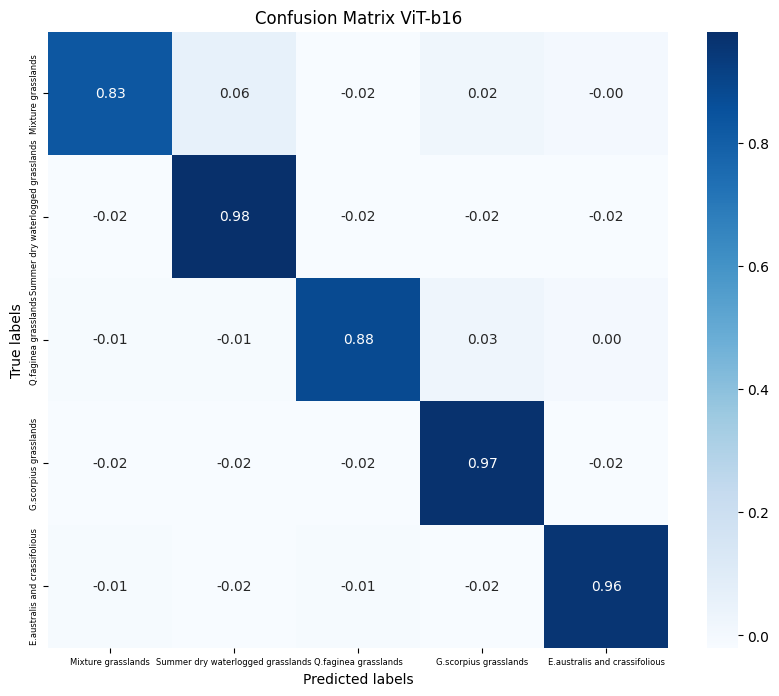

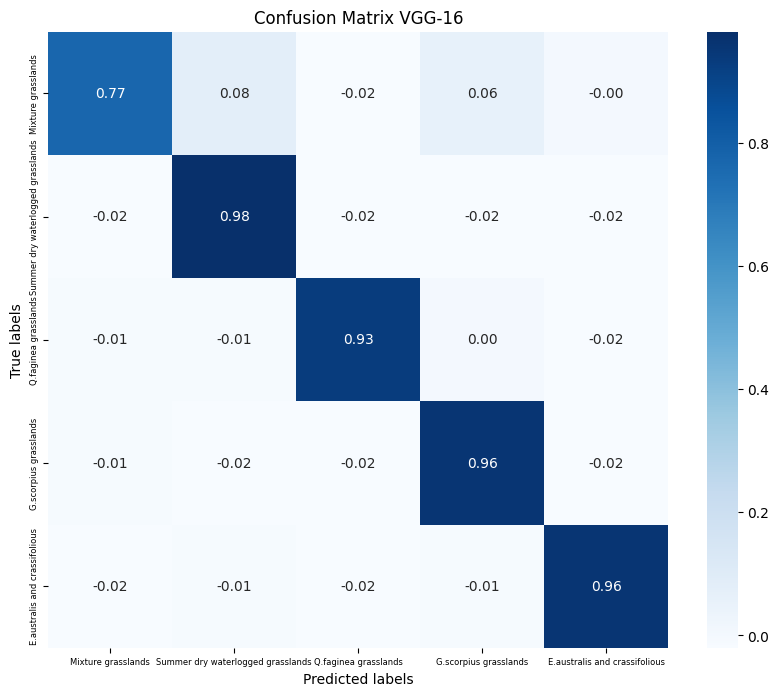

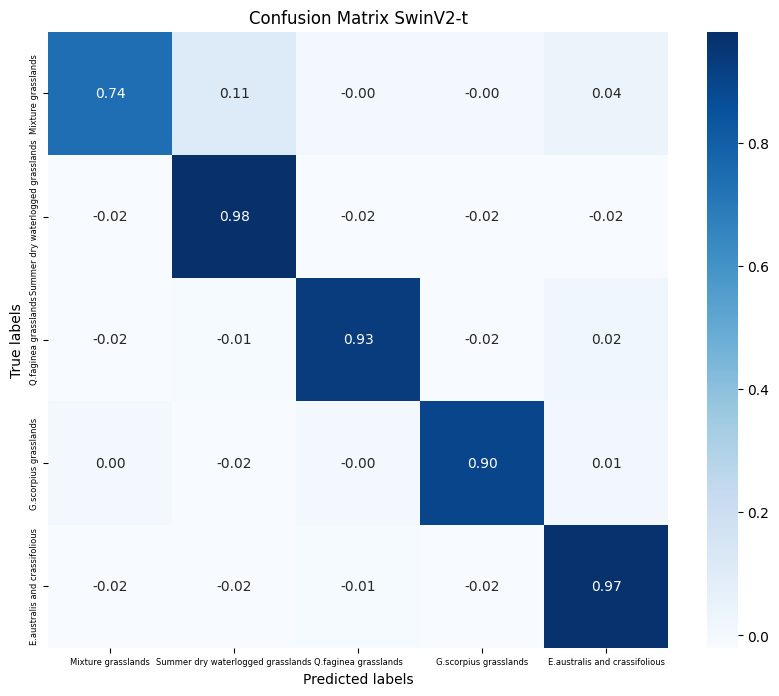

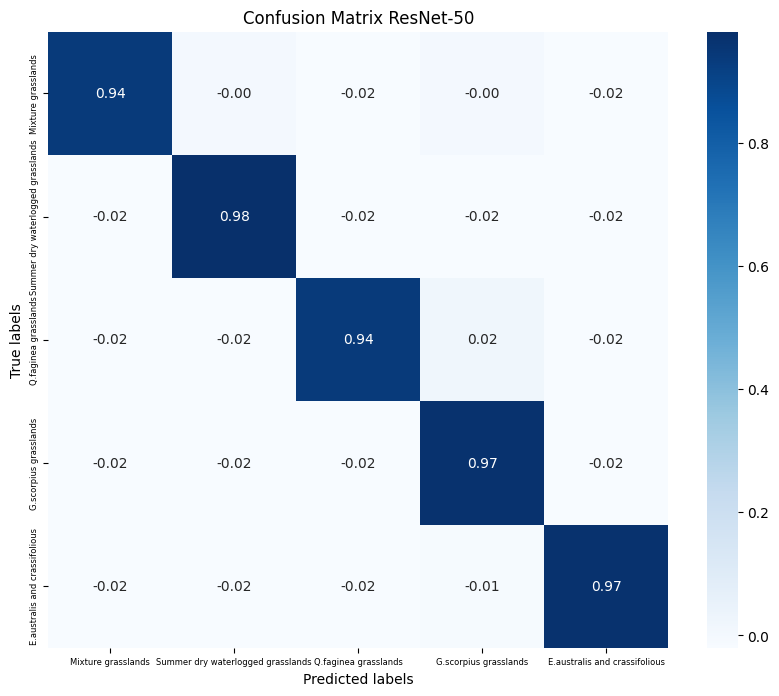

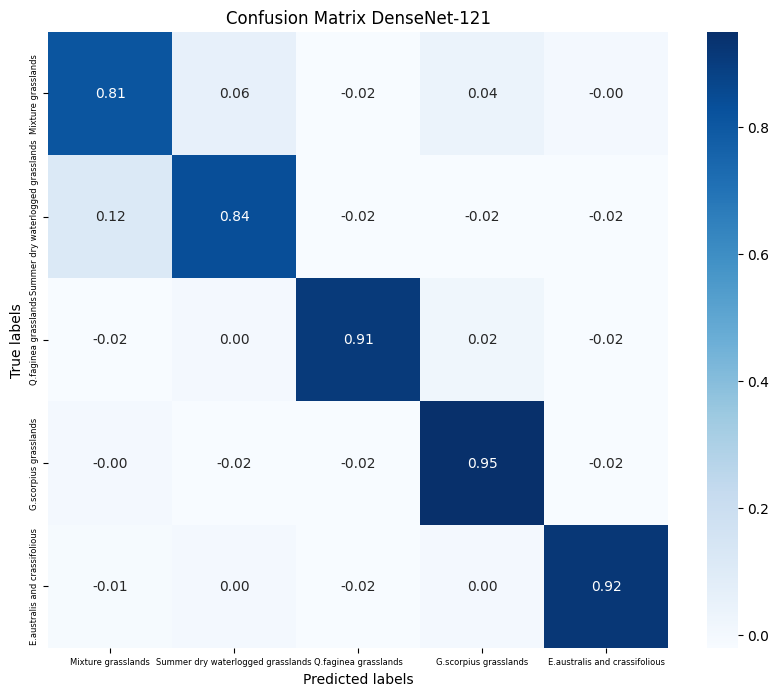

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# seed = 42
# torch.manual_seed(seed)  # Example seed. Be very Carefull. If seed is not set here too. Data Loader will create a different testing set.

CV_labels = {
    "50.a.01.101": "Mixture grasslands",
    "59.b.04.101": "Summer dry waterlogged grasslands",
    "76.c.10.001": "Q.faginea grasslands",
    "52.a.05.001": "G.scorpius grasslands",
    "61.a.02.004": "E.australis and crassifolious"
}

# Get original filenames and class indices
original_filenames = [item[0] for item in image_dataset.imgs]
class_indices = [item[1] for item in image_dataset.imgs] #if item[1]== 4

# Get original class names
original_class_names = image_dataset.classes
original_class_names = [original_class_names[idx] for idx in class_indices]

class_names = dict(zip(class_indices,original_class_names))

for i in range(len(class_names)):
    for label in CV_labels:
        if label in class_names[i]:
            class_names[i] = CV_labels[label]

print(class_names)


model1 = torch.load('' ) 
model2 = torch.load('' ) 
model3 = torch.load('' ) 
model4 = torch.load('' ) 
model5 = torch.load('' ) 
model6 = torch.load('' ) 
model7 = torch.load('' ) 
model8 = torch.load('' ) 
model9 = torch.load('' ) 
model_dict = {
    1: model1,
    4: model4,
    5: model5,
    8: model8,
    9: model9
}
model_name_dict = {
    1: "ViT-b16",
    4: "VGG-16",
    5: "SwinV2-t",
    8: "ResNet-50",
    9: "DenseNet-121"
}

for i in range(1,10): 
    # Test the final model
    try:
        seed = 42
        torch.manual_seed(seed) 
        c_model = model_dict[i]
        c_model.eval()
        true_labels = []
        predicted_labels = []
        outputs_m = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = c_model(inputs)
                outputs_m.append(outputs)
                class_label, predicted = torch.max(outputs, 1)
                true_labels.extend(labels.numpy())
                predicted_labels.extend(predicted.numpy())


        # Calculate confusion matrix
        conf_matrix = confusion_matrix(true_labels, predicted_labels)
        # Normalize confusion matrix
        conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


        # Plot confusion matrix
        viz_name =  model_name_dict[i]
        plt.figure(figsize=(10, 8))
        sns.heatmap((conf_matrix_normalized-0.021837).round(2), annot=True, cmap="Blues", fmt='.2f')  # Use '.2f' format to display floats with 2 decimal places
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix {viz_name}')

        # Set x-axis and y-axis labels using original class names with centered labels
        plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names.values(), fontsize=6)
        plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names.values(), fontsize=6)

        plt.show()
    except Exception:
        pass

# Define the directory for saving the image
# image_dir = 
# os.makedirs(image_dir, exist_ok=True)  # Create the directory if it doesn't exist


# Save the confusion matrix plot as an image file
# viz_name = f'{model_name}'
# image_path = os.path.join(image_dir, f'{viz_name}.jpeg')
# plt.savefig(image_path, format='jpeg')  
# plt.close()  # Close the plot to release resources


#TEST COPNFUSION MATRIX ON ROWS

In [44]:
dataset_n = 4

In [6]:
import pandas as pd
from sklearn.metrics import classification_report

# Define the directory and filename for saving the Excel file
save_results_dir = ''


for i in range(1,10): 

    try:
        # Test the final model

        c_model = model_dict[i]

        true_labels = []
        predicted_labels = []
        model_name =  model_name_dict[i]
        excel_filename = f"model_{dataset_n}_{model_name}_seed{str(seed)}.xlsx"
        excel_path = os.path.join(save_results_dir, excel_filename)

        seed_list = [42,4,18,19,23,43,24,5,31,37]

        for j in seed_list:
            with torch.no_grad():
                seed = 42
                torch.manual_seed(j) 
                c_model.eval()
                for inputs, labels in test_loader:
                    outputs = c_model(inputs)
                    _, predicted = torch.max(outputs, 1)
                    true_labels.extend(labels.numpy())
                    predicted_labels.extend(predicted.numpy())

        # Calculate classification report
        report = classification_report(true_labels, predicted_labels, output_dict=True)

        # Convert classification report to pandas DataFrame
        df = pd.DataFrame.from_dict(report)
        df.iloc[1] -= 0.021837
        df= df.round(2)
        print("Pandas DataFrame:")
        print(df)

        # Save DataFrame to Excel file
        df.to_excel(excel_path, index=True)

        print(f"Classification report saved to: {excel_path}")
    except: pass
    # Exception as original_error:
    #     # Handling the exception
    #     print("An error occurred:", original_error)
    #     raise ValueError("Custom error message") from original_error
  
     
    


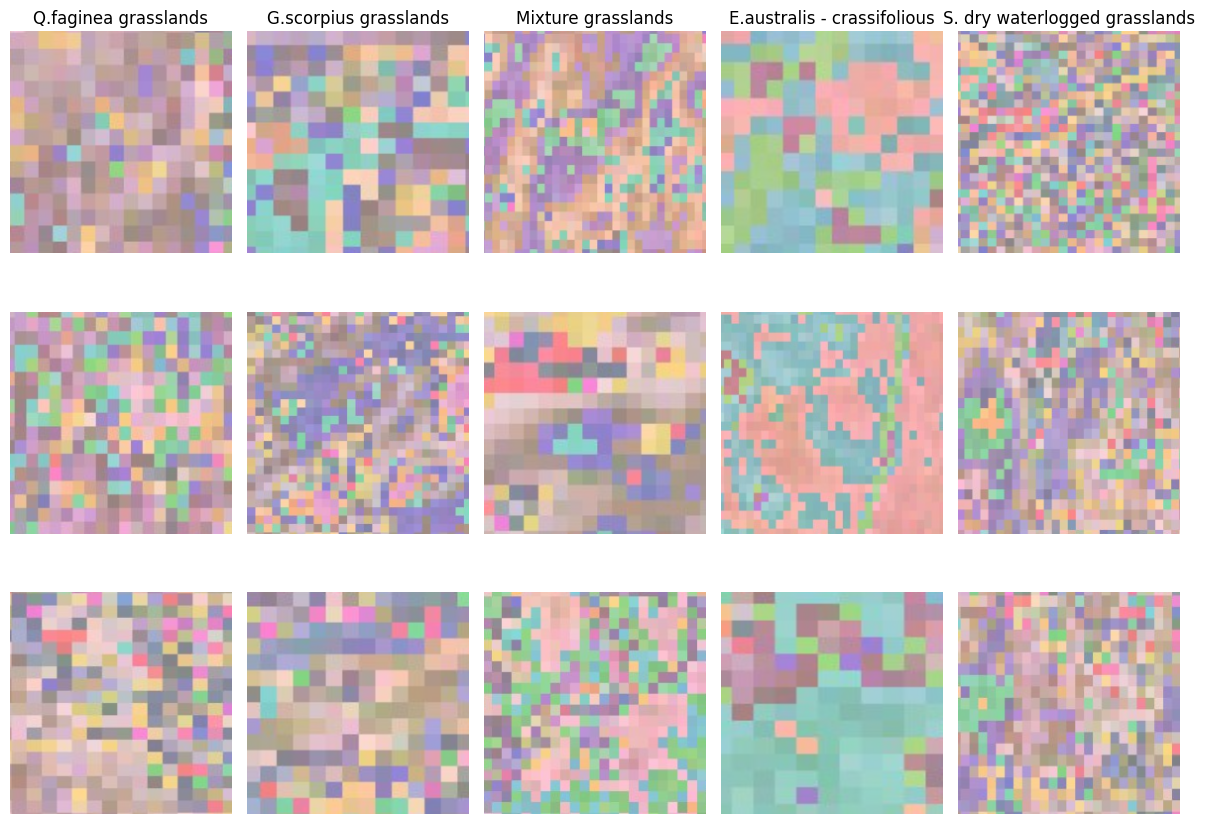

In [12]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataLoader is named 'dataloader' and each batch consists of (images, labels)
# Assuming your images are normalized (usually done in PyTorch datasets)
CV_labels = {
    "50.a.01.101": "Mixture grasslands",
    "59.b.04.101": "S. dry waterlogged grasslands",
    "76.c.10.001": "Q.faginea grasslands",
    "52.a.05.001": "G.scorpius grasslands",
    "61.a.02.004": "E.australis - crassifolious"
}

# Get original filenames and class indices
original_filenames = [item[0] for item in image_dataset.imgs]
class_indices = [item[1] for item in image_dataset.imgs] #if item[1]== 4

# Get original class names
original_class_names = image_dataset.classes
original_class_names = [original_class_names[idx] for idx in class_indices]

class_names = dict(zip(class_indices,original_class_names))

for i in range(len(class_names)):
    for label in CV_labels:
        if label in class_names[i]:
            class_names[i] = CV_labels[label]

def get_example_images(test_loader):
    example_images = {}
    for images, labels in test_loader:
        for image, label in zip(images, labels):
            class_idx = label.item()
            if class_idx not in example_images:
                example_images[class_idx] = [image]
            else:
                if len(example_images[class_idx]) < 3:  # Change from 2 to 3
                    example_images[class_idx].append(image)
            if all(len(images) == 3 for images in example_images.values()):  # Change from 2 to 3
                break
    return example_images
    

# Function to create a collage with three images per class
def create_collage(example_images):
    fig, axes = plt.subplots(3, 5, figsize=(12, 9))  # Adjusted to 3 rows

    for i, (class_idx, images) in enumerate(example_images.items()):
        for j, image in enumerate(images[:3]):  # Adjusted to take three images
            row_idx = j
            col_idx = i

            # Convert the image tensor to numpy array
            image = image.permute(1, 2, 0).numpy()
            # Denormalize the image (if it was normalized during data loading)
            image = (image * 0.5) + 0.5  # Assuming normalization range [-1, 1]

            axes[row_idx, col_idx].imshow(image)
            if j == 0:  # Name only the first image of each class
                axes[row_idx, col_idx].set_title(class_names[class_idx])
            
            axes[row_idx, col_idx].axis('off')

    plt.tight_layout()
    plt.show()



# Usage
example_images = get_example_images(test_loader)
create_collage(example_images)

